In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy import constants as const
from blackbody import plancks_law, plancks_law_wl, spectral_flux_density, spectral_irradiance, nu_l_nu, l_nu, power, wiens_law, wiens_law_f
from data import bran_z, photometry_data, t_peak_mjd, bran_disc
from flux_utils import bands, flux_conversion

In [2]:
temp = 20000

nu_range = np.logspace(11, 20, 100)
l_range = np.linspace(0.0, 3.0, 100)[1:] * 10.**-6.

In [3]:
print(plancks_law(10**15, 10000))
from astropy import constants as const
from astropy import units as u

1.2244794080759375e-07 J / (m2 sr)


In [4]:
print((const.c/(1 * u.nm)).to("Hz"))
print(plancks_law_wl(0.6*10**-6, 5000))
print(const.c*plancks_law(u.s*const.c/(0.6*10**-6*u.m), 5000).to("kW m^-2 sr^-1 Hz^-1"))

2.9979245799999994e+17 Hz
12.762388541757584 kW / (m2 nm sr)
0.0045944598750327316 kW / (Hz m s sr)


Peak wavelength 5.8e+02 nm
Peak frequency 5.2e+14 Hz
Peak frequency 5.8e+02 nm


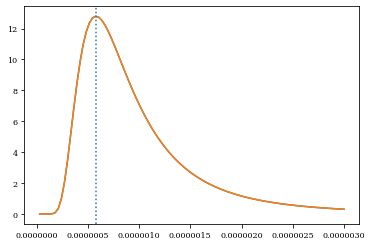

In [5]:
# for t in [10.**4.4, 10**4.6]:

def convert_pl(f, temp=5000):
    plf = (plancks_law(f * u.s, 5000) * (f ** 2 /const.c)).to("kW m^-2 sr^-1 nm^-1")
    return plf

nu_r = (const.c / (l_range * u.m)).to("Hz")

plt.plot(l_range, plancks_law_wl(l_range, 5000))
plt.plot(l_range, convert_pl(nu_r, 5000))
peak_wl = wiens_law(5000)
print(f"Peak wavelength {peak_wl:.2g}")
plt.axvline(peak_wl.value/10**9, linestyle=":")
peak_f = wiens_law_f(5000)
print(f"Peak frequency {peak_f:.2g}")
pkwl = (const.c/peak_f).to("nm")
print(f"Peak frequency {pkwl:.2g}")
# plt.axvline(peak_f.value, linestyle=":")
# plt.xscale("log")
# plt.yscale("log")
# plt.ylim(bottom=10**-24)

Peak frequency 5.2e+14 Hz


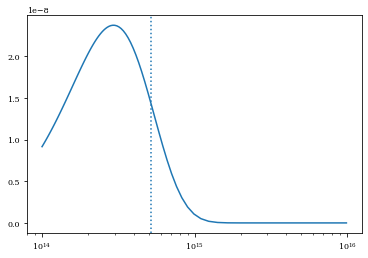

In [6]:
# for t in [10.**4.4, 10**4.6]:
plt.plot(nu_r, plancks_law(nu_r * u.s, 5000))
# plt.plot(nu_r, convert_pl(nu_r, 5000))
peak_f = wiens_law_f(5000)
print(f"Peak frequency {peak_f:.2g}")
plt.axvline(peak_f.value, linestyle=":")
plt.xscale("log")
# plt.yscale("log")
# plt.ylim(bottom=10**-24)

9.034052344438133e-32 J / (m2 sr)


/usr/local/anaconda3/envs/bran_stark_paper/lib/python3.8/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(6725161981496.805, 1.345032396299361e+16)

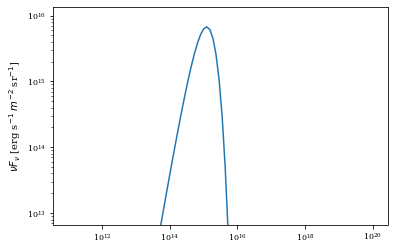

In [7]:
y = np.array([x.value for x in plancks_law(nu_range, 15000)]) *nu_range * u.joule.to("erg")
print(plancks_law(10.*14, 15000))
plt.plot(nu_range, y)
plt.yscale("log")
plt.ylabel(r"$\nu F_{\nu}$ [erg s$^{-1}$ $m^{-2}$ sr$^{-1}$]")
plt.xscale("log")
plt.ylim(0.001*max(y), 2*max(y))

1.890422038145047e-22 erg / cm2


/usr/local/anaconda3/envs/bran_stark_paper/lib/python3.8/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(1.670542010405044e-17, 3.3410840208100876e-14)

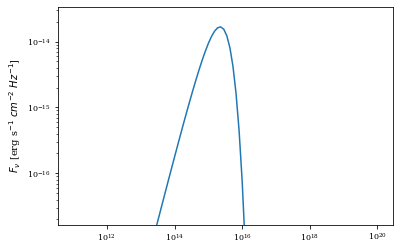

In [8]:
plt.figure()
y = np.array([x.value for x in spectral_flux_density(nu_range, 10**4.6, z=bran_z, r_bb_cm = 10**14.5)])
print(spectral_flux_density(nu_range[0], 10**4.6, z=bran_z, r_bb_cm = 10**14.5))
plt.plot(nu_range, y)
plt.yscale("log")
plt.ylabel(r"$F_{\nu}$ [erg s$^{-1}$ $cm^{-2}$ $Hz^{-1}$]")
plt.xscale("log")
plt.ylim(0.001*max(y), 2*max(y))

Peak frequency 4.1e+15 Hz


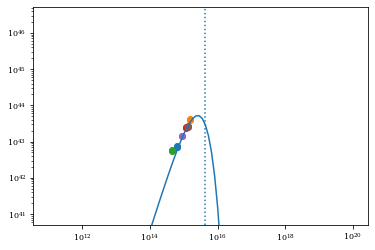

In [9]:
t_offset = bran_disc.mjd - t_peak_mjd.mjd

lower = 50
upper = 55


mask = np.logical_and(
    photometry_data["#day_since_peak"] - t_offset > lower,
    photometry_data["#day_since_peak"] - t_offset < upper,
)

plt.figure()
ax = plt.subplot(111)
    
data = photometry_data[mask]

fs = []
lums = []

for band in list(set(data["band"][mask])):
    if band in bands:
        wl = bands[band].to("m")
        f = (const.c / wl).to("Hz")

        bmask = np.logical_and(
            data["band"] == band,
            data["lum"] > 0.
        )

        bd = 10**-23 * data[bmask]["flux_Jy"] * data[bmask]["nu_rest"]/ flux_conversion
#             err = data[data["band"] == band]["lum"]
#             bd = np.array(list(bd[bd > 0]))

        x = np.ones_like(bd) * f.value
        if len(bd) > 0:
            ax.scatter(
                x,
                bd
            ) 
            
            
y = np.array([x.value for x in l_nu(nu_range, 10**4.5, r_bb_cm = 10**14.5)]) *nu_range
plt.plot(nu_range, y)

peak_f = wiens_law_f(10**4.6)
print(f"Peak frequency {peak_f:.2g}")
plt.axvline(peak_f.value, linestyle=":")
plt.ylim(0.001*max(y), 1000.*max(y)) 
plt.yscale("log")
plt.xscale("log")

In [10]:
power(10**4.6, r_bb_cm = 10**14.65)

<Quantity 3.57126108e+44 erg / s>

In [11]:
temp = 0.067 * u.keV
tk = (temp / const.k_B).to("K")
print(f"Temp: {temp:.2g}, {tk:.2g}")
power(tk.value, r_bb_cm = 2. * 10**11)

Temp: 0.067 keV, 7.8e+05 K


<Quantity 1.04157188e+43 erg / s>

1.8588255309986738e-38 erg / cm2


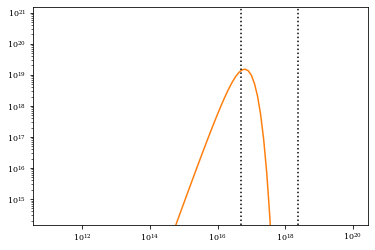

In [12]:
y = np.array([x.value for x in spectral_irradiance(nu_range, 10**4.6)])*nu_range
plt.plot(nu_range, y)
y = np.array([x.value for x in spectral_irradiance(nu_range, tk.value)])*nu_range
plt.plot(nu_range, y)
peak_f = wiens_law_f(tk.value)
plt.axvline((0.2 * u.keV / const.h).to("Hz").value, color="k", linestyle=":")
plt.axvline((10 * u.keV / const.h).to("Hz").value, color="k", linestyle=":")
plt.ylim(0.00001*max(y), 100.*max(y)) 
plt.yscale("log")
plt.xscale("log")
print(spectral_irradiance(peak_f.value, 10**4.6))

1.8588255309986738e-38 erg / cm2


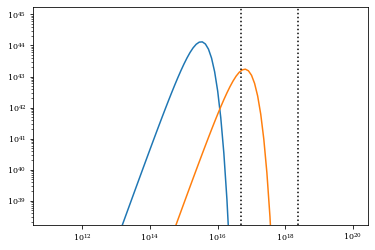

In [13]:
y = np.array([x.value for x in nu_l_nu(nu_range, 10**4.6, 10**14.5)])
plt.plot(nu_range, y)
y = np.array([x.value for x in nu_l_nu(nu_range, tk.value, 3 * 10**11)])
plt.plot(nu_range, y)
peak_f = wiens_law_f(tk.value)
plt.axvline((0.2 * u.keV / const.h).to("Hz").value, color="k", linestyle=":")
plt.axvline((10 * u.keV / const.h).to("Hz").value, color="k", linestyle=":")
plt.ylim(0.00001*max(y), 100.*max(y)) 
plt.yscale("log")
plt.xscale("log")
print(spectral_irradiance(peak_f.value, 10**4.6))